10:11:41 - cmdstanpy - INFO - Chain [1] start processing
10:11:41 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-08-06  544.434982  492.944794  659.958413   544.434982   544.434982   
1   2021-08-09  548.523826  509.963963  671.910746   548.523826   548.523826   
2   2021-08-10  549.886774  498.787584  675.691203   549.886774   549.886774   
3   2021-08-11  551.249722  512.784506  671.835061   551.249722   551.249722   
4   2021-08-12  552.612670  505.966209  672.258334   552.612670   552.612670   
..         ...         ...         ...         ...          ...          ...   
251 2022-08-01  480.460413  280.968004  764.928447   250.977230   721.154248   
252 2022-08-02  477.410774  277.013655  776.015795   237.354892   732.336795   
253 2022-08-03  474.361134  256.693811  795.644248   221.085519   743.573036   
254 2022-08-04  471.311495  242.120940  796.168413   202.287494   754.734014   
255 2022-08-05  468.261856  224.115795  795.022068   191.657711   765.799449   

     additive_terms  additive_terms_low

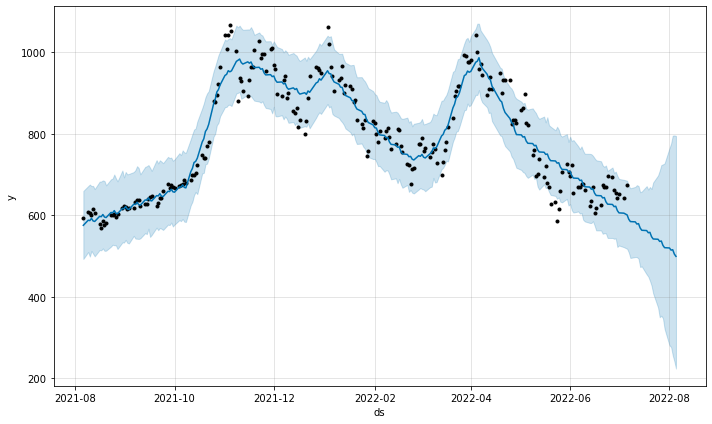

In [1]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('data.csv')

model = Prophet(interval_width=0.95, daily_seasonality=True, changepoint_prior_scale=0.5, seasonality_prior_scale=1, holidays_prior_scale=1)
m = model.fit(df)


future = m.make_future_dataframe(periods=30)

# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

forecast = m.predict(future)

print(forecast)
plot1 = m.plot(forecast)

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')